In [2]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 50)

from sklearn import preprocessing, neighbors, model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('C:\Users\Jagupta\ds-sf-36\Datasets\storms.csv.gz')

C:\Users\Jagupta\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,9,10,11,12,16,17,27,28,29,30,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df


,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,...,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,...,8626.0,0.0,0.0,NaN,4.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,...,8642.0,0.0,0.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
902292,56.0,11/30/2011 0:00:00,10:30:00 PM,MST,7.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A strong cold front moved s...,902293.0
902293,30.0,11/10/2011 0:00:00,02:48:00 PM,MST,9.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A strong westerly flow alof...,902294.0
902294,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902295.0
902295,2.0,11/9/2011 0:00:00,10:21:00 AM,AKS,202.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902296.0


In [8]:
%qtconsole

In [ ]:
#data overview
df.shape
df.info()
df.describe()

#histogram of all and each column
df.hist()
df.Beds.plot(kind = 'hist', figsize = (8, 8))


#Correlations
df.corr() # correlation matrix
df.Beds.corr(df.Baths) # specific correlation between two columns
#Colorful correlation metrics

figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

#Box plots of all and each column
df.boxplot()
df.SalePrice.plot(kind = 'box', figsize = (8, 8))

#Scatter plots
df.plot(kind = 'scatter', x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))


# Scatter matrix
pd.tools.plotting.scatter_matrix(df[ ['Beds', 'Baths'] ], diagonal = 'kde', s = 500, figsize = (8, 8))
pd.tools.plotting.scatter_matrix(df[ ['SalePrice', 'Size'] ], s = 200, figsize = (8, 8))



# Scatter matrix with colors for different groups
color = df.Species.map({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'})
pd.tools.plotting.scatter_matrix(df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ], c = color, figsize = (12, 12))



# output numer of null values

#http://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/
#http://wrobstory.github.io/2013/04/real-world-pandas-1.html


# count unique counts
df.groupby(by = ["x","y"])["sale_type"].nunique().reset_index()




In [18]:
df.head()


,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,14.0,100.0,3.0,0.0,0.0,15.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.0,150.0,2.0,0.0,0.0,0.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,FAYETTE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.1,123.0,2.0,0.0,0.0,2.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3340.0,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,MADISON,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,100.0,2.0,0.0,0.0,2.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3458.0,8626.0,0.0,0.0,NaN,4.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,CULLMAN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,150.0,2.0,0.0,0.0,2.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3412.0,8642.0,0.0,0.0,NaN,5.0


AttributeError: Unknown property s

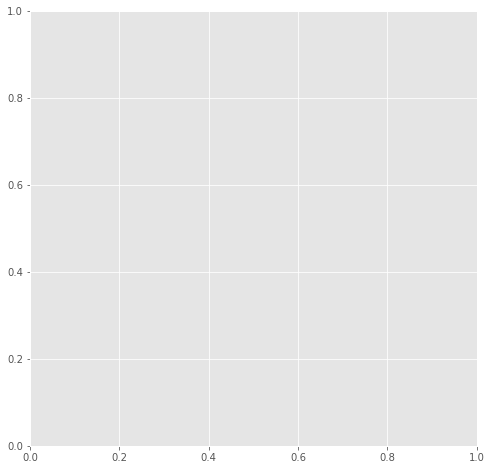

In [42]:
#df.describe()

#df.isnull().sum().sort_values()

#df.EVTYPE.value_counts()

#df.groupby(by = ["EVTYPE"])["INJURIES"].sum().sort_values()

df1= df[ (df['INJURIES']==0) & (df['FATALITIES']>0) ].EVTYPE.value_counts()
df1.plot(kind = 'bar', s = 100, figsize = (8, 8))
#df1

df.newcol1 = df.INJURIES +df.FATALITIES
df[df['newcol1'] > 0].EVTYPE.value_counts()
#df.newcol1.


In [66]:
df['newcol1'] = df.INJURIES +df.FATALITIES

x = df[df['newcol1'] > 0].EVTYPE.value_counts()

s=x[x>5].index.values
s

array(['TORNADO', 'LIGHTNING', 'TSTM WIND', 'FLASH FLOOD',
       'THUNDERSTORM WIND', 'EXCESSIVE HEAT', 'HIGH WIND', 'FLOOD',
       'RIP CURRENT', 'THUNDERSTORM WINDS', 'HAIL', 'AVALANCHE',
       'RIP CURRENTS', 'WINTER STORM', 'STRONG WIND', 'HEAT', 'WILDFIRE',
       'HEAVY SNOW', 'WILD/FOREST FIRE', 'HEAVY RAIN', 'EXTREME COLD',
       'HIGH WINDS', 'ICE STORM', 'FOG', 'EXTREME COLD/WIND CHILL',
       'HIGH SURF', 'BLIZZARD', 'COLD/WIND CHILL', 'WINTER WEATHER',
       'DUST STORM', 'URBAN/SML STREAM FLD', 'TROPICAL STORM',
       'HEAVY SURF/HIGH SURF', 'WIND', 'DENSE FOG', 'HURRICANE', 'COLD',
       'HEAT WAVE', 'TSTM WIND/HAIL', 'HURRICANE/TYPHOON',
       'WINTER WEATHER/MIX', 'HEAVY SURF', 'LANDSLIDE', 'FLASH FLOODING',
       'STRONG WINDS', 'FLOOD/FLASH FLOOD', 'MARINE STRONG WIND', 'GLAZE',
       'EXTREME WINDCHILL', 'ICY ROADS', 'EXTREME HEAT', 'DUST DEVIL',
       'DRY MICROBURST', 'MARINE THUNDERSTORM WIND', 'SNOW', 'STORM SURGE',
       'ICE', 'FREEZING RAIN', 'HIG

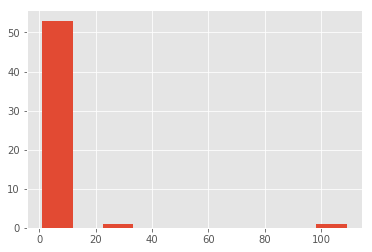

In [73]:
x.value_counts().hist()

In [98]:
# get a distribution of injuries vs length of event

#df_endanalayis =
#BGN_DATE 	BGN_TIME
#END_DATE 	END_TIME
#df.isnull('END_DATE')

#df1=df.dropna(subset=['END_DATE']) 

#a =pd.to_datetime(df1 ['END_DATE'])
#b =pd.to_datetime(df1 ['BGN_DATE'])

#df1['Duration'] = a-b
df1['Duration'] = df.apply(lambda x: (a-b), axis=1)

df1

TypeError: ("ufunc subtract cannot use operands with types dtype('S17') and dtype('<M8[ns]')", u'occurred at index 0')

In [67]:
df_new = df[df.EVTYPE.isin(s) == True]
df_new

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM,newcol1
0,1.0,4/18/1950 0:00:00,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,14.0,100.0,3.0,0.0,0.0,15.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0,15.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.0,150.0,2.0,0.0,0.0,0.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0,0.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,FAYETTE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.1,123.0,2.0,0.0,0.0,2.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3340.0,8742.0,0.0,0.0,NaN,3.0,2.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,MADISON,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,100.0,2.0,0.0,0.0,2.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3458.0,8626.0,0.0,0.0,NaN,4.0,2.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,CULLMAN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,150.0,2.0,0.0,0.0,2.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3412.0,8642.0,0.0,0.0,NaN,5.0,2.0
5,1.0,11/15/1951 0:00:00,2000,CST,77.0,LAUDERDALE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.5,177.0,2.0,0.0,0.0,6.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3450.0,8748.0,0.0,0.0,NaN,6.0,6.0
6,1.0,11/16/1951 0:00:00,100,CST,9.0,BLOUNT,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.5,33.0,2.0,0.0,0.0,1.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3405.0,8631.0,0.0,0.0,NaN,7.0,1.0
7,1.0,1/22/1952 0:00:00,900,CST,123.0,TALLAPOOSA,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,33.0,1.0,0.0,0.0,0.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3255.0,8558.0,0.0,0.0,NaN,8.0,0.0
8,1.0,2/13/1952 0:00:00,2000,CST,125.0,TUSCALOOSA,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,3.3,100.0,3.0,0.0,1.0,14.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3334.0,8740.0,3336.0,8738.0,NaN,9.0,15.0
9,1.0,2/13/1952 0:00:00,2000,CST,57.0,FAYETTE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.3,100.0,3.0,0.0,0.0,0.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3336.0,8738.0,3337.0,8737.0,NaN,10.0,0.0


In [111]:
# state with highest $ damage
def convertFunc(x):
    if x =="K":
        return '1000'
    elif x =="M":
        return '1000000'
    else :
        return'0'



In [112]:
#df['PROPDMGEXP_new'] =df.PROPDMGEXP.apply(convertFunc)
df['PROPDMGEXP_Normalized'] =df['PROPDMGEXP_new']*df['PROPDMG']
#df.PROPDMGEXP.value_counts()


TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('S32') dtype('S32') dtype('S32')